# Bayesian Theory

This jupyter notebook accompanies the Bayesian Shenaniganry lecture(s) delivered by Justin Alsing and Stephen Feeney as part of [Astro Hack Week 2019](http://astrohackweek.org/2019/). As part of the lecture(s) you will be asked to complete a number of tasks, some of which will involve direct coding into the notebook; these sections are marked by task. This notebook requires numpy, matplotlib and scipy. If you don't have these packages fret not: the notebook can be run on [Google Colab](https://colab.research.google.com/github/sfeeney/ahw19/blob/master/ahw_intro_complete.ipynb).

We start with imports...

In [1]:
from __future__ import print_function

# make sure everything we need is installed if running on Google Colab
def is_colab():
    try:
        cfg = get_ipython().config
        if cfg['IPKernelApp']['kernel_class'] == 'google.colab._kernel.Kernel':
            return True
        else:
            return False
    except NameError:
        return False
if is_colab():
    !pip install --quiet numpy matplotlib scipy

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.stats as sps
%matplotlib inline

## Task 1

You have a coin and want to know the probability with which it gives heads $\theta$. You make 10 tosses and get 3H, 7T. What is the posterior for $\theta$ (assume tosses are independent and uniform prior, for now)?

Text(0, 0.5, '${\\rm P}(\\theta)$')

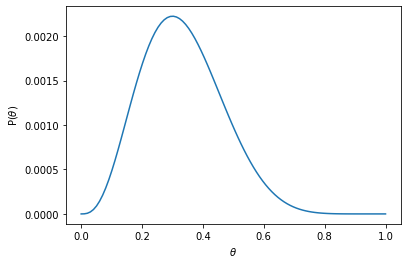

In [2]:
def post_binomial(n, k, theta):
    return theta ** k * (1.0 - theta) ** (n - k)

theta_grid = np.linspace(0.0, 1.0, 100)
plt.plot(theta_grid, post_binomial(10, 3, theta_grid))
plt.xlabel(r'$\theta$')
plt.ylabel(r'${\rm P}(\theta)$')

## Task 2

You have some nuclear material and want to know the decay rate, $\lambda$ (per day). You measure the number of decays for five days and get d = (4, 0, 3, 2, 4, 2, 3). What’s your posterior for $\lambda$ (assume decays are independent and Poisson, and uniform prior for now)?

Text(0, 0.5, '${\\rm P}(\\lambda)$')

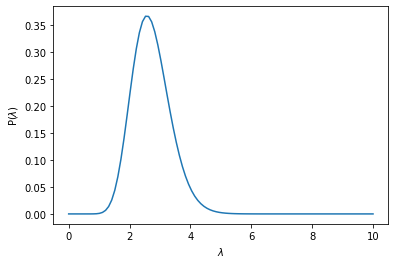

In [3]:
def post_poisson(counts, rate):
    
    return rate ** np.sum(counts) * np.exp(-rate * len(counts))

counts = np.array([4, 0, 3, 2, 4, 2, 3])
rate_grid = np.linspace(0.0, 10.0, 100)
plt.plot(rate_grid, post_poisson(counts, rate_grid))
plt.xlabel(r'$\lambda$')
plt.ylabel(r'${\rm P}(\lambda)$')

## Task 3

You’re at the doctor getting your baby weighed. The doc takes five measurements: d = (4.49, 5.15, 5.26 , 5.90, 4.86) kg. On the scale it (conveniently) says it has uncorrelated Gaussian errors with $\sigma$ = 0.5 kg. What’s your posterior for your baby’s weight (assuming uniform priors)?

Text(0, 0.5, '${\\rm P}(w)$')

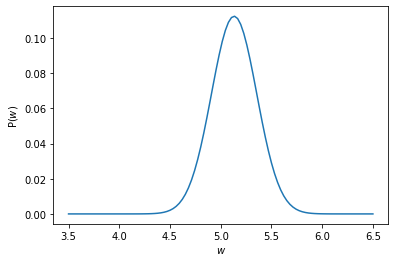

In [4]:
def post_gaussian(measurements, error, weight):
    
    n_grid = len(weight)
    post = np.zeros(n_grid)
    for i in range(n_grid):
        post[i] = np.exp(-0.5 * np.sum((measurements - weight[i]) ** 2) / error ** 2)
    
    return post

measurements = np.array([4.49, 5.15, 5.26 , 5.90, 4.86])
error = 0.5
weight_grid = np.linspace(3.5, 6.5, 100)
plt.plot(weight_grid, post_gaussian(measurements, error, weight_grid))
plt.xlabel(r'$w$')
plt.ylabel(r'${\rm P}(w)$')

You’re skeptical that the stated uncertainties on the scales are correct. What’s your joint posterior for your baby’s weight, $w$, and the standard deviation of the scales, $\sigma$?

Text(0, 0.5, '$\\sigma$')

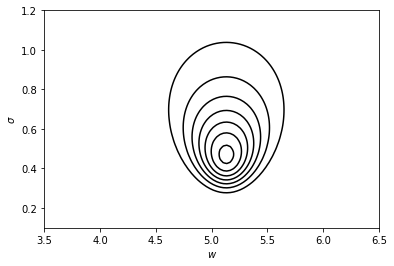

In [5]:
def post_gaussian_mu_sig(measurements, weight, error):
    
    n_m = len(measurements)
    n_w = len(weight)
    n_e = len(error)
    post = np.zeros((n_w, n_e))
    for i in range(n_w):
        for j in range(n_e):
            post[i, j] = np.exp(-0.5 * np.sum((measurements - weight[i]) ** 2) / error[j] ** 2) / error[j] ** n_m
    
    return post

error_grid = np.linspace(0.1, 1.2, 101)
post = post_gaussian_mu_sig(measurements, weight_grid, error_grid)
plt.contour(weight_grid, error_grid, post.T, colors='k')
plt.xlabel(r'$w$')
plt.ylabel(r'$\sigma$')

Can you marginalize over $\sigma$ and compare with the case of known standard deviation? (Spoiler: you should get a Student’s-t posterior for your baby’s weight.)

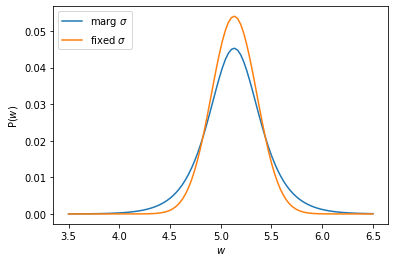

In [6]:
post_weight = np.sum(post, axis=1)
post_weight_fixed_var = post_gaussian(measurements, error, weight_grid)
plt.plot(weight_grid, post_weight / np.sum(post_weight), label='marg $\sigma$')
plt.plot(weight_grid, post_weight_fixed_var / np.sum(post_weight_fixed_var), label='fixed $\sigma$')
plt.xlabel(r'$w$')
plt.ylabel(r'${\rm P}(w)$')
plt.legend(loc='upper left')

## Task 4

For the coin toss problem, plot the uniform prior $\beta(\theta;1,1)$, Jeffreys prior $\beta(\theta;1/2,1/2)$, and the posteriors you get for both. Recall we had $k=3$ heads from $n=10$ trials. Discuss the features and differences! What happens if $k=0$ and $n=2$?

In [49]:
k = 3
n = 10
theta_grid = np.linspace(0.0, 1.0, 1000)
uniform_prior = sps.beta.pdf(theta_grid, 1, 1)
jeffreys_prior = sps.beta.pdf(theta_grid, 0.5, 0.5)
post_uniform_prior = sps.beta.pdf(theta_grid, 1+k, 1+n-k)
post_jeffreys_prior = sps.beta.pdf(theta_grid, 0.5+k, 0.5+n-k)

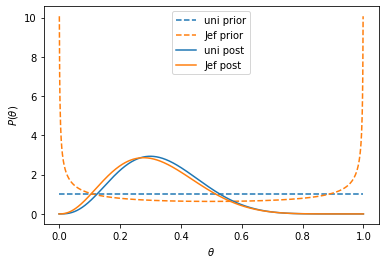

In [50]:
plt.plot(theta_grid, uniform_prior, color='C0', ls='--', label='uni prior')
plt.plot(theta_grid, jeffreys_prior, color='C1', ls='--', label='Jef prior')
plt.plot(theta_grid, post_uniform_prior, color='C0', ls='-', label='uni post')
plt.plot(theta_grid, post_jeffreys_prior, color='C1', ls='-', label='Jef post')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(\theta$)')
plt.legend(loc='upper center')

## Task 5

Use the Savage-Dickey Density Ratio to calculate the evidence ratio between a model assuming a fair coin $\theta=0.5$ and another assuming a coin with unknown head probability (and a uniform prior on that probability). Again, recall that we had $k=3$ heads from $n=10$ trials. What happens if $k=30$ and $n=100$? What changes if you use a Jeffreys prior instead?

In [57]:
k = 3
n = 10
complex_model_prior = sps.beta.pdf(0.5, 1, 1)
complex_model_posterior = sps.beta.pdf(0.5, 1+k, 1+n-k)
evidence_ratio = complex_model_posterior / complex_model_prior
print(evidence_ratio)

1.289062500000001
